In [139]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [140]:
import numpy as np

In [141]:
x_train.shape

(60000, 28, 28)

In [142]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

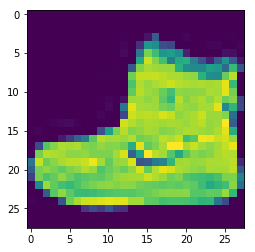

In [143]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(x_train[0])
plt.show()

In [144]:
y_train[0]

9

In [145]:
y_train.shape

(60000,)

In [146]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [147]:
y_train[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.], dtype=float32)

In [148]:
y_train.shape

(60000, 10)

In [149]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [150]:
img_rows, img_cols = 28, 28
num_classes = 10

In [151]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [152]:
x_train.shape

(60000, 28, 28, 1)

In [153]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [154]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [155]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [156]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [157]:
batch_size = 128
epochs = 12

In [158]:
y_test[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.], dtype=float32)

In [130]:
y_train.shape

(60000, 10)

In [131]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 57s 955us/step - loss: 0.7025 - acc: 0.7415 - val_loss: 0.4641 - val_acc: 0.8226
Epoch 2/12
60000/60000 [==============================] - 56s 940us/step - loss: 0.4648 - acc: 0.8321 - val_loss: 0.3811 - val_acc: 0.8617
Epoch 3/12
60000/60000 [==============================] - 58s 966us/step - loss: 0.3986 - acc: 0.8558 - val_loss: 0.3462 - val_acc: 0.8715
Epoch 4/12
60000/60000 [==============================] - 57s 946us/step - loss: 0.3649 - acc: 0.8687 - val_loss: 0.3389 - val_acc: 0.8769
Epoch 5/12
60000/60000 [==============================] - 56s 938us/step - loss: 0.3405 - acc: 0.8780 - val_loss: 0.3125 - val_acc: 0.8862
Epoch 6/12
60000/60000 [==============================] - 57s 954us/step - loss: 0.3206 - acc: 0.8855 - val_loss: 0.3148 - val_acc: 0.8851
Epoch 7/12
60000/60000 [==============================] - 57s 948us/step - loss: 0.3060 - acc: 0.8890 - val_loss: 0.

In [133]:
!mkdir model

In [134]:
!ls

F-MNIST.ipynb model


In [136]:
model.save('model/Fashion-CNN.h5')

In [137]:
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics(Test loss & Test Accuracy): ")
print(metrics)

Metrics(Test loss & Test Accuracy): 
[0.25356824511289594, 0.9083]
